## Exploratory Data Analysis (EDA) for Nestle Sales Dataset

This report presents an exploratory data analysis of the Nestle sales dataset, aiming to uncover key insights and trends that can inform business decisions.

### 1. Data Loading and Initial Inspection
First, we load the dataset and examine its structure and basic information.

In this step, we import the necessary libraries (pandas, matplotlib, and seaborn) and load the dataset to inspect the structure and initial details of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
df = pd.read_excel("C:/Users/muge/Dropbox/GMU/Portfolio/Nestle/NESTLE SALES DATASET.xlsx")

# Display basic info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  object        
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  object        
 5   Sales Medium    18115 non-null  object        
 6   Sales count     18115 non-null  int64         
 7   Product Count   18115 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB
None

Missing Values:
 Sales ID          0
Date              0
Product Name      0
Total Revenue     0
Sales Location    0
Sales Medium      0
Sales count       0
Product Count     0
dtype: int64


The dataset is:

* Relatively clean (no missing values).
* Contains a mix of categorical (object), datetime, and numerical (float64, int64) data.
* Suitable for various sales analyses, such as:
    * Trend analysis over time (using the "Date" column).
    * Product performance analysis (using "Product Name," "Total Revenue," "Sales count," and "Product Count").
    * Location-based sales analysis (using "Sales Location").
    * Sales medium analysis.
    * Calculating average revenue per product.
    * Calculating total sales per location.

This information is a crucial first step in any data analysis workflow, as it provides a clear understanding of the dataset's structure and quality.

### 2. Handling Missing Values
Here, we check for any missing values in the dataset, providing a summary and visualizing it using a heatmap to quickly identify patterns of missingness. Visualizing missing values helps us understand their distribution.

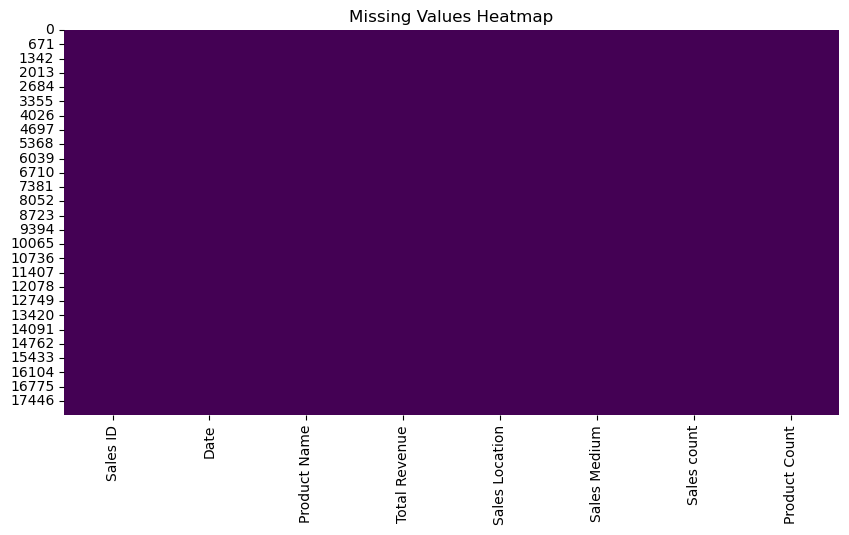

In [2]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

##### Actions:

Based on the nature and extent of missing values, we decide on appropriate handling strategies (e.g., imputation or removal). Here we are not imputing or removing, but it is important to check the heatmap to determine the best course of action.

### 3. Data Cleaning and Preprocessing
We clean the data by removing duplicate entries. Removing duplicate rows ensures data integrity andensures that the dataset does not have duplicate records, which could skew the analysis.



In [3]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

### 4. Summary Statistics
We examine the summary statistics of the dataset to understand key numerical metrics such as mean, median, standard deviation, etc.

In [4]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Total Revenue  Sales count  Product Count
count   18115.000000      18115.0        18115.0
mean     1701.339026          1.0            1.0
std      2893.481093          0.0            0.0
min        11.580000          1.0            1.0
25%       460.480000          1.0            1.0
50%       992.470000          1.0            1.0
75%      2156.000000          1.0            1.0
max    127968.750000          1.0            1.0


##### Insights:

Summary statistics (mean, median, standard deviation, etc.) provide insights into the central tendency and variability of numerical columns.

* Single-Product Sales: The "Sales count" and "Product Count" columns consistently having a value of 1 indicate that each sale in this dataset involves only one product.
* Revenue Variability: There's a wide range of total revenue, with a high standard deviation and a very large maximum value. This suggests that some sales generate significantly more revenue than others.
* Weekday distribution: The weekday distribution is fairly even.
* Outliers: The very high maximum revenue value ($127,968.75) might be an outlier and warrants further investigation.

This summary provides a valuable overview of the numerical data, highlighting key characteristics and potential areas for further analysis.

#### 5. Categorical Variable Analysis
This part inspects the unique values in the categorical columns to understand the variety and categories of products, sales locations, and mediums. We examine unique values in categorical columns to understand the variety of products, locations, and sales mediums.

In [5]:
# Check unique values in categorical columns
categorical_columns = ["Product Name", "Sales Location", "Sales Medium"]
for col in categorical_columns:
    print(f"\nUnique values in {col}:\n", df[col].unique())


Unique values in Product Name:
 ['Nescafe' 'Maggi' 'Kit Kat' 'Nescafe Gold' 'Nes Cau' 'Milo'
 'Nestle Drumstick' 'Smarties' 'Nesquik Duo']

Unique values in Sales Location:
 ['Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia']

Unique values in Sales Medium:
 ['Online' 'Direct']


##### Insights:

This helps identify the scope and categories of each categorical variable.

* Product Diversity:
    * The dataset covers a range of Nestle products, from coffee (Nescafe) to snacks (Kit Kat, Smarties) and culinary items (Maggi).
* Geographical Coverage:
    * The sales data includes transactions from all major regions of Australia.
* Sales Channels:
    * Sales are made through two distinct channels: online and direct.

Implications for Analysis:
* These unique values are essential for grouping and analyzing sales data. For example, we can:
    * Compare sales performance across different product lines.
    * Analyze regional sales trends.
    * Evaluate the effectiveness of online versus direct sales channels.
    
This information is very helpful for creating group by statements, and pivot tables.

### 6. Revenue Distribution
We visualize the distribution of total revenue to understand its spread.

The histogram and kernel density estimate (KDE) graph for Total Revenue help to visualize how the revenue is distributed across all the records, giving insights into its spread and skewness.

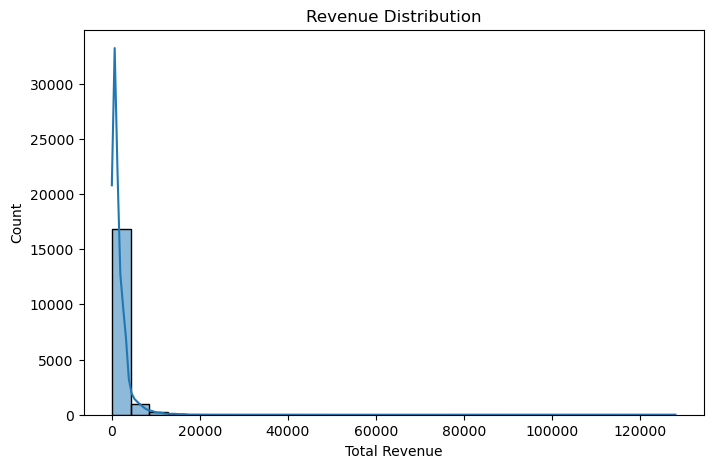

In [6]:
# Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Total Revenue")
plt.ylabel("Count")
plt.show()

##### Insights:

The histogram shows the distribution of revenue, indicating skewness and potential outliers.

Key Components:

* Histogram (Bars): The bars represent the frequency or count of data points (sales transactions) falling within specific revenue ranges (bins). The height of each bar corresponds to the number of sales within that range.
* Kernel Density Estimate (Line): The line represents a smoothed estimate of the probability density function of the revenue data. It provides a continuous approximation of the underlying distribution.
* X-axis (Total Revenue): This axis shows the range of total revenue values, from 0 to approximately 120,000.
* Y-axis (Count): This axis represents the number of sales transactions falling within each revenue range.

Interpretation:

* Highly Skewed Distribution: The most striking feature is the strong positive skew of the distribution. The vast majority of sales have relatively low revenue, concentrated in the left-hand side of the chart (close to 0). There's a long tail extending towards the right, indicating a few sales with exceptionally high revenue.
* Concentration of Low-Revenue Sales: The tallest bar and the peak of the KDE are located near the beginning of the x-axis, suggesting that a large proportion of sales generate low revenue.
* Outliers or High-Value Sales: The long tail towards the right indicates the presence of outliers or sales with significantly higher revenue compared to the majority. These high-value sales are relatively infrequent but contribute substantially to the overall revenue.
* Shape of the Distribution: The KDE line shows a sharp peak at low revenue values and gradually declines as revenue increases. This suggests a non-normal distribution, likely exponential or log-normal.

Implications:

* Typical Sales Value: The chart highlights that the typical sale generates a relatively low revenue.
* Impact of High-Value Sales: While infrequent, the high-value sales have a significant impact on the overall revenue distribution.
* Potential for Further Analysis: This visualization suggests the need for further analysis to understand the characteristics of both low-revenue and high-revenue sales. For example:
    * What products are associated with high-value sales?
    * What customer segments generate high-value sales?
    * Are there any specific sales channels or locations associated with high-value sales?
* Outlier Management: The presence of outliers might require investigation and potential handling (e.g., removal, transformation) depending on the purpose of the analysis.

This chart reveals that the "Total Revenue" distribution is highly skewed, with a large concentration of low-revenue sales and a few high-value sales significantly impacting the overall distribution. This insight is valuable for understanding the sales patterns and guiding further analysis to optimize revenue generation.

### 7. Sales Trend Over Time (Monthly and Daily)
We analyze sales trends over time to identify patterns.

#### Monthly
We aggregate sales data by month, providing insights into how sales and revenue evolved over time. This can help spot seasonal trends or growth patterns.

<Axes: title={'center': 'Sales Trend Over Time'}, xlabel='Month'>

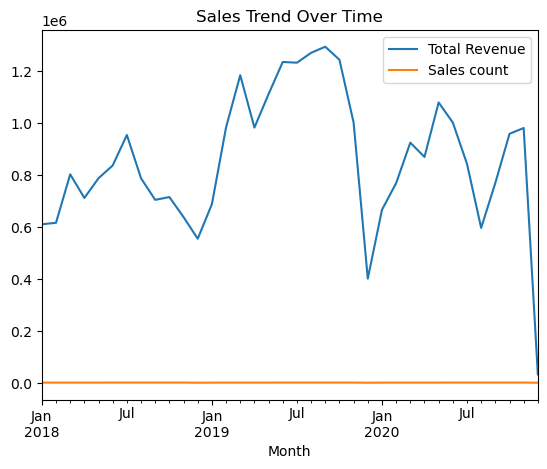

In [7]:
df['Month'] = df['Date'].dt.to_period('M')  # For monthly data
sales_by_month = df.groupby('Month').agg({'Total Revenue': 'sum', 'Sales count': 'sum'})
sales_by_month.plot(kind='line', title="Sales Trend Over Time")

This chart depicts the "Sales Trend Over Time" using a line plot, showing the evolution of "Total Revenue" and "Sales count" over the months from January 2018 to around January 2021.

* X-axis (Month): Represents the progression of time, with labels indicating specific months (January and July) across the years 2018, 2019, and 2020.
* Y-axis (Total Revenue): Represents the magnitude of "Total Revenue," measured in millions (as indicated by "1e6" at the top).

Interpretation:

* Total Revenue Fluctuations: The blue line (Total Revenue) shows significant fluctuations over time.
    * Initial Period (Jan 2018 - mid-2019): Revenue shows moderate fluctuations, with a general upward trend.
    * Mid-2019 to early 2020: Revenue peaks, showing a strong increase and then a gradual decline.
    * Early 2020 to early 2021: Revenue shows more erratic fluctuations with a sharp drop towards the end.
* Sales Count: The orange line (Sales count) is consistently near zero throughout the entire period. This suggests that the scale of "Sales count" is significantly smaller compared to "Total Revenue" and might not be as relevant for analysis in this context. It could also imply an error in data representation.
* Time-Based Patterns: There seem to be potential seasonal or cyclical patterns in the "Total Revenue" data. More data points and a longer time frame would be needed to confirm these patterns.
* Significant Drop at the End: The sharp drop in "Total Revenue" towards the end of the chart (around early 2021) is a significant observation. This could indicate a major event, change in strategy, or data anomaly that needs further investigation.

Implications:

* Revenue Volatility: The chart highlights the volatility of "Total Revenue" over time, indicating potential instability in sales.
* Sales Count Discrepancy: The "Sales count" data needs to be reviewed for accuracy or relevance as it doesn't provide meaningful insights in this visualization.

Potential for Further Analysis:
* Investigate the factors contributing to the fluctuations in "Total Revenue."
* Explore potential seasonality or cyclical patterns.
* Determine the cause of the sharp drop in revenue at the end of the observed period.
* Re-evaluate the "Sales count" data for potential errors or alternative representations.

This chart shows a dynamic "Total Revenue" trend with significant fluctuations over time, while "Sales count" appears to be inconsequential

#### Daily
A daily trend of total revenue is plotted, providing a granular view of how sales revenue fluctuated on a day-to-day basis.

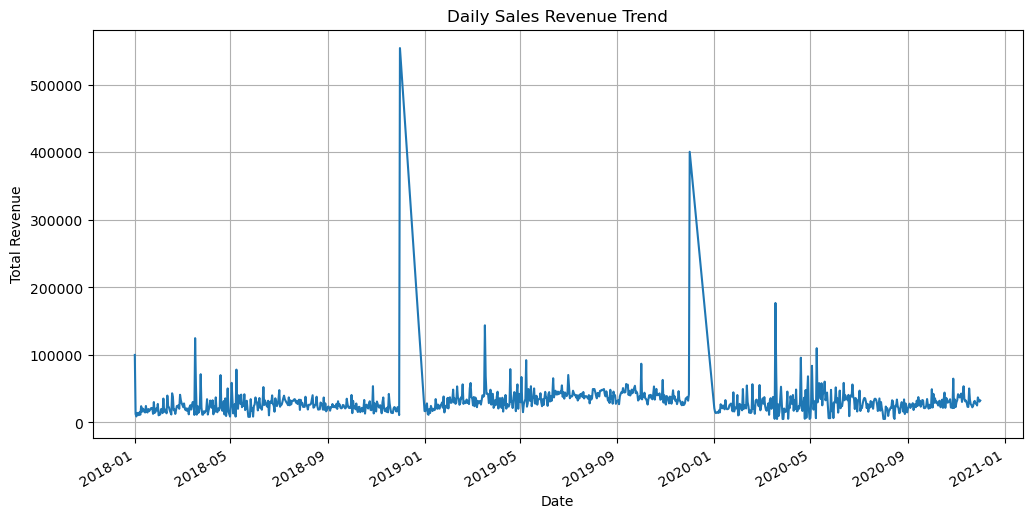

In [8]:
# Sales trend over time
plt.figure(figsize=(12,6))
df.groupby("Date")["Total Revenue"].sum().plot()
plt.title("Daily Sales Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

This chart displays the "Daily Sales Revenue Trend" over time, specifically showing the "Total Revenue" on a daily basis from January 2018 to January 2021. 

Interpretation:

* Daily Fluctuations: The chart shows significant daily fluctuations in "Total Revenue". This indicates that sales revenue varies considerably from day to day.
* Low Baseline Revenue: The majority of the daily revenue values are relatively low, forming a baseline level.
* Sharp Spikes: There are several distinct sharp spikes in the "Total Revenue". These spikes represent days with exceptionally high sales revenue.
    * Two prominent spikes occur around early 2019 and early 2020.
    * Other smaller spikes are also visible.
* Potential Outliers: The sharp spikes could be indicative of outliers, special events, promotions, or other factors that significantly boosted sales on those particular days.
* Lack of Clear Trend: While there are daily variations, it's challenging to identify a clear overall trend or pattern in the daily revenue. The data appears to be quite noisy.

Implications:

* Sales Volatility: The chart highlights the high volatility of daily sales revenue.
* Impact of Special Events: The sharp spikes suggest that certain events or factors have a considerable impact on daily revenue.
* Need for Further Investigation:
    * The causes of the sharp spikes should be investigated to understand the drivers of high-revenue days.
    * Further analysis could be performed to identify any underlying patterns or seasonality in the daily sales data.
    * It would be useful to look at what marketing or sales promotions were happening on the days of the spikes.
* Data Granularity: The daily granularity of the data provides a detailed view of sales fluctuations, but it may be necessary to aggregate the data into weekly or monthly intervals to identify longer-term trends.

This chart shows a highly volatile daily sales revenue trend with several significant spikes. The spikes likely indicate special events or outliers that warrant further investigation.

### 8. Sales Distribution by Weekday
We examine sales patterns across different weekdays. This bar chart analyzes sales by day of the week, helping to identify which days have the highest or lowest sales performance.

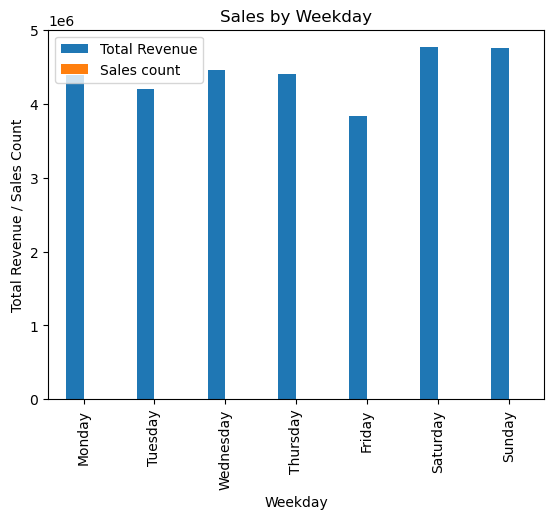

In [9]:
# Get day of the week (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Date'].dt.weekday  

# Map weekdays to names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday_Name'] = df['Weekday'].map(dict(enumerate(weekday_names)))

# Group by Weekday Name and calculate total revenue and sales count
sales_by_weekday = df.groupby('Weekday_Name').agg({'Total Revenue': 'sum', 'Sales count': 'sum'})

# Sort by weekday order (Monday to Sunday)
sales_by_weekday = sales_by_weekday.loc[weekday_names]

# Plot sales by weekday
sales_by_weekday.plot(kind='bar', title="Sales by Weekday")
plt.xlabel('Weekday')
plt.ylabel('Total Revenue / Sales Count')
plt.show()

This chart is a bar chart that visualizes "Sales by Weekday" by showing "Total Revenue" and "Sales count" for each day of the week (Monday to Sunday).

Interpretation:

* Total Revenue Variation: The blue bars clearly show the variation in total revenue across different weekdays.
    * High Revenue Days: Saturday and Sunday exhibit the highest total revenue, followed closely by Wednesday.
    * Moderate Revenue Days: Monday, Tuesday, and Thursday have moderately high revenue.
    * Low Revenue Day: Friday has the lowest total revenue among all weekdays.
* Sales Count: The orange bars are very small and barely visible. This indicates that the scale of "Sales count" is significantly lower than "Total Revenue" and is not easily comparable on this chart. It could also mean that the sales count is relatively consistent across all days.
* Weekday Patterns: There is a clear pattern of higher sales towards the weekend (Saturday and Sunday) and lower sales on Friday. This could be due to various factors, such as customer behavior, promotional activities, or business hours.

Implications:

* Weekend Sales Focus: The chart suggests that weekend sales are a significant driver of overall revenue.
* Friday Sales Performance: The low sales on Friday might require investigation to understand the underlying reasons.
* Sales Count Discrepancy: The "Sales count" data needs to be reviewed for accuracy or relevance as it doesn't provide meaningful insights in this visualization. It is possible that it is just a much smaller number than total revenue.

Potential for Further Analysis:
* Investigate the factors contributing to the higher weekend sales.
* Explore potential strategies to improve Friday sales performance.
* Re-evaluate the "Sales count" data for potential errors or alternative representations.

This chart highlights a clear pattern of higher sales revenue on weekends and lower sales revenue on Fridays. The "Sales count" data is not effectively represented in this visualization.

### 9. Top Products Analysis
We identify the top-performing products based on revenue and sales count. This analysis identifies the top 10 products based on revenue and sales count, providing insights into which products are performing the best in terms of both financial returns and volume

Top 10 Products by Revenue:
                   Total Revenue
Product Name                   
Milo                 5952661.22
Nescafe              5540926.55
Nesquik Duo          4274963.56
Nes Cau              3305206.60
Nestle Drumstick     3199164.78
Smarties             2364330.72
Kit Kat              2226687.31
Maggi                2226571.83
Nescafe Gold         1729243.88


<Figure size 1000x600 with 0 Axes>

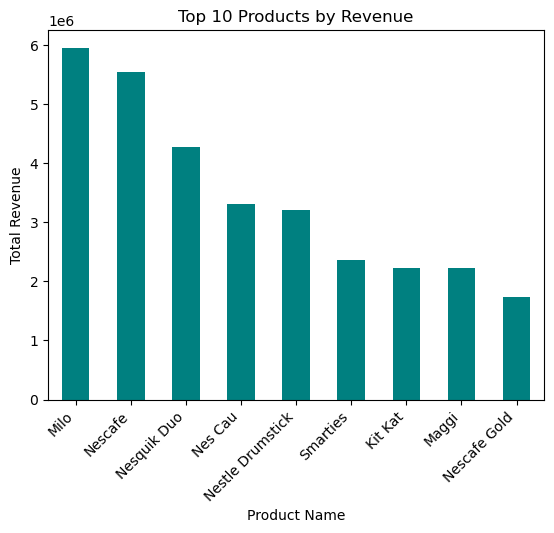

In [10]:
# Top 10 products by revenue
top_products_revenue = df.groupby('Product Name').agg({'Total Revenue': 'sum'}).sort_values(by='Total Revenue', ascending=False).head(10)
print("Top 10 Products by Revenue:\n", top_products_revenue)

# Reset index to make 'Product Name' a column for plotting
top_products_revenue = top_products_revenue.reset_index()

# Plot the top 10 products by revenue
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', x='Product Name', y='Total Revenue', legend=False, color='teal')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

This chart is a vertical bar chart displaying the "Top 10 Products by Revenue".

Interpretation:

* Product Performance: The chart visually compares the revenue generated by the top 10 products.
* Top Performers: "Milo" has the highest revenue, followed closely by "Nescafe".
* Revenue Decline: The revenue generally decreases as we move from left to right along the x-axis, indicating a ranking of products from highest to lowest revenue.
* Significant Revenue Difference: There is a noticeable difference in revenue between "Milo" and "Nescafe" compared to the other products.
* Lower Revenue Products: "Nescafe Gold" has the lowest revenue among the top 10 products.

Implications:

* Key Products: "Milo" and "Nescafe" are the top revenue generators, indicating their importance to the business.
* Product Strategy: The company might want to focus on strategies to further boost the sales of the top performers and potentially improve the performance of lower-revenue products.
* Marketing Focus: Marketing and sales efforts might be concentrated on the top-performing products to maximize revenue.
* Product Portfolio Analysis: This chart provides a good overview of the product portfolio and can be used for further analysis to understand the factors contributing to the revenue differences.

This chart highlights the top 10 products based on revenue, with "Milo" and "Nescafe" being the clear leaders. It provides a quick and effective way to visualize product performance and inform business strategies.


Top 10 Products by Sales Count:
                   Sales count
Product Name                 
Nescafe                  6368
Nestle Drumstick         2028
Kit Kat                  1978
Milo                     1619
Maggi                    1555
Nes Cau                  1457
Nescafe Gold             1299
Nesquik Duo              1014
Smarties                  797


<Figure size 1000x600 with 0 Axes>

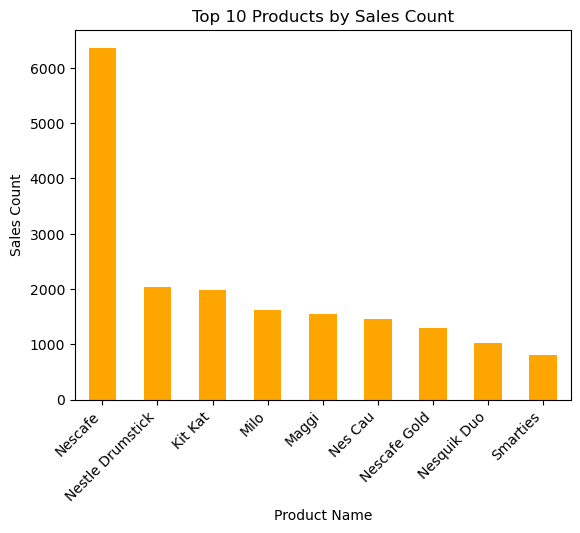

In [11]:
# Top 10 products by sales count
top_products_count = df.groupby('Product Name').agg({'Sales count': 'sum'}).sort_values(by='Sales count', ascending=False).head(10)
print("\nTop 10 Products by Sales Count:\n", top_products_count)

# Reset index to make 'Product Name' a column for plotting
top_products_count = top_products_count.reset_index()

# Plot the top 10 products by sales count
plt.figure(figsize=(10, 6))
top_products_count.plot(kind='bar', x='Product Name', y='Sales count', legend=False, color='orange')
plt.title("Top 10 Products by Sales Count")
plt.xlabel("Product Name")
plt.ylabel("Sales Count")
plt.xticks(rotation=45, ha='right')
plt.show()

This chart is a vertical bar chart displaying the "Top 10 Products by Sales Count". 

Interpretation:

* Product Popularity: The chart visually compares the sales count of the top 10 products, indicating their popularity.
* Top Seller: "Nescafe" has the highest sales count, significantly more than any other product.
* Sales Decline: The sales count generally decreases as we move from left to right along the x-axis, indicating a ranking of products from highest to lowest sales count.
* Significant Sales Difference: There is a large difference in sales count between "Nescafe" and the other products.
* Lower Sales Count Products: "Smarties" has the lowest sales count among the top 10 products.

Implications:

* Key Product: "Nescafe" is the most popular product, indicating its strong market presence.
* Sales Strategy: The company might want to focus on strategies to maintain the high sales of "Nescafe" and potentially boost the sales of other products.
* Marketing Focus: Marketing and sales efforts might be concentrated on "Nescafe" to maximize its sales potential.
* Product Portfolio Analysis: This chart provides a good overview of the product portfolio based on sales count and can be used for further analysis to understand the factors contributing to the sales differences.

This chart highlights the top 10 products based on sales count, with "Nescafe" being the clear leader. It provides a quick and effective way to visualize product popularity and inform business strategies.


Top Products by Revenue per Product:
                   Revenue per Product
Product Name                         
Nesquik Duo               4215.940394
Milo                      3676.751834
Smarties                  2966.537917
Nes Cau                   2268.501441
Nestle Drumstick          1577.497426
Maggi                     1431.878990
Nescafe Gold              1331.211609
Kit Kat                   1125.726648
Nescafe                    870.120375


<Figure size 1000x600 with 0 Axes>

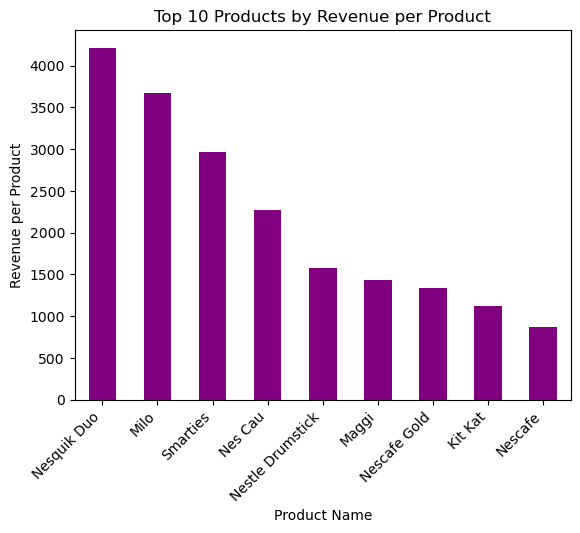

In [12]:
# Revenue per Product
# This step calculates the average revenue generated by each product, highlighting which products generate the most revenue relative to their count sold.
df['Revenue per Product'] = df['Total Revenue'] / df['Product Count']
revenue_per_product = df.groupby('Product Name').agg({'Revenue per Product': 'mean'}).sort_values(by='Revenue per Product', ascending=False)

# Display the top products by revenue per product
print("\nTop Products by Revenue per Product:\n", revenue_per_product.head(10))

# Plot the top 10 products by revenue per product
plt.figure(figsize=(10, 6))
revenue_per_product.head(10).plot(kind='bar', y='Revenue per Product', legend=False, color='purple')
plt.title("Top 10 Products by Revenue per Product")
plt.xlabel("Product Name")
plt.ylabel("Revenue per Product")
plt.xticks(rotation=45, ha='right')
plt.show()

This chart is a vertical bar chart displaying the "Top 10 Products by Revenue per Product"

Interpretation:

* Revenue per Product Comparison: The chart visually compares the revenue generated per product sold for the top 10 products.
* Highest Revenue per Product: "Nesquik Duo" has the highest revenue per product.
* Revenue Decline: The revenue per product generally decreases as we move from left to right along the x-axis, indicating a ranking of products from highest to lowest revenue per product.
* Significant Revenue Difference: There is a noticeable difference in revenue per product between "Nesquik Duo" and the other products.
* Lowest Revenue per Product: "Nescafe" has the lowest revenue per product among the top 10 products.

Implications:

* Product Profitability: "Nesquik Duo" generates the highest revenue per product, suggesting it may be a high-profit-margin product.
* Pricing Strategy: The company might want to analyze the pricing strategy for "Nesquik Duo" to understand why it generates higher revenue per product.
* Product Portfolio Analysis: This chart provides a good overview of the product portfolio based on revenue per product and can be used for further analysis to understand the factors contributing to the revenue differences.

Potential for Further Investigation:
* Investigate the factors contributing to the higher revenue per product for "Nesquik Duo".
* Explore potential strategies to improve the revenue per product for other products.
* Compare this chart with the "Top 10 Products by Sales Count" and "Top 10 Products by Revenue" charts to get a more comprehensive understanding of product performance.

This chart highlights the top 10 products based on revenue per product, with "Nesquik Duo" being the clear leader. It provides a quick and effective way to visualize product profitability and inform business strategies.

What it might mean when a product like Nescafe has the highest sales count but the lowest revenue per product:

Low Unit Price:
* Nescafe might be sold at a significantly lower price point compared to other products in the top 10 list.
* Even with high sales volume, the low price per unit results in lower overall revenue per product.   

Product Variety/Sizes:
* Nescafe could have a wide range of product sizes or variations, including smaller, more affordable options.
* If a large portion of sales consists of these lower-priced options, it would bring down the average revenue per product.

Bulk Sales/Discounts:
* Nescafe might be sold in bulk or offered with frequent discounts, leading to lower revenue per unit sold.
* Promotional activities could boost sales volume but decrease the average revenue per product.

Market Penetration Strategy:
* The company might be prioritizing market share over profit margins for Nescafe.
* A low-price, high-volume strategy could be used to attract a broader customer base and establish brand loyalty.

Product Lifecycle:
* Nescafe could be in a mature stage of its product lifecycle, where price competition is intense.
* To maintain sales volume, the company might be forced to lower prices.

Distribution Channels:
* Nescafe may be sold in places that have lower mark ups. Such as large discount retail locations.

Implications for Business:

* Profit Margin Analysis: The company should carefully analyze the profit margins for Nescafe to ensure profitability despite the low revenue per product.
* Pricing Strategy Review: The pricing strategy for Nescafe might need to be reviewed to optimize revenue and profitability.
* Product Mix Optimization: The company might consider adjusting the product mix or promoting higher-priced Nescafe variations to increase revenue.
* Customer Segmentation: Understanding the customer segments that purchase Nescafe could help tailor marketing and pricing strategies.
* Cost Efficiency: With lower revenue per product, controlling costs is crucial for maintaining profitability.

While high sales volume is a positive indicator, it's essential to consider revenue per product and profit margins to assess the overall financial performance of a product.

##### Compare this chart with the "Top 10 Products by Sales Count" and "Top 10 Products by Revenue" charts

This will give us a more nuanced understanding of how each product contributes to the overall business.

Here's a breakdown of the key insights from comparing the charts:

1. Nescafe:
* Sales Count: Highest by a significant margin.
* Revenue: Second highest.
* Revenue per Product: Lowest.
* Nescafe is the most popular product in terms of volume but generates lower revenue per unit. This likely indicates a high-volume, low-price strategy.

2. Milo:
* Sales Count: Moderate.
* Revenue: Highest.
* Revenue per Product: High.
* Milo generates the most revenue despite not being the top seller in volume. This suggests a higher price point and potentially higher profit margins per unit.

3. Nesquik Duo:
* Sales Count: Low.
* Revenue: High.
* Revenue per Product: Highest.
* Nesquik Duo has the highest revenue per product, even though it's not a high-volume seller. This points to a premium product with a high price point.

4. Nestle Drumstick:
* Sales Count: High (second highest).
* Revenue: Moderate.
* Revenue per Product: Moderate to Low.
* Nestle Drumstick sells well in terms of volume but doesn't command a high price per unit.

5. Kit Kat:
* Sales Count: High (similar to Nestle Drumstick).
* Revenue: Moderate.
* Revenue per Product: Low.
* Similar to Nestle Drumstick, Kit Kat sells in good volume but has a lower revenue per unit.

6. Maggi:
* Sales Count: Moderate.
* Revenue: Moderate.
* Revenue per Product: Moderate.
* Maggi has a relatively consistent performance across all three metrics.

7. Nes Cau:
* Sales Count: Moderate.
* Revenue: Moderate.
* Revenue per Product: Moderate.
* Nes Cau shows a fairly balanced performance.

8. Nescafe Gold:
* Sales Count: Moderate.
* Revenue: Lowest.
* Revenue per Product: Low to Moderate.
* Nescafe Gold generates less revenue overall, even though its sales count isn't the lowest. This could indicate a lower price point or lower sales volume compared to other products.

9. Smarties:
* Sales Count: Lowest.
* Revenue: Moderate.
* Revenue per Product: High.
* Smarties has the lowest sales volume but a higher revenue per product, suggesting a higher price per unit, similar to Nesquik Duo.

10.   General Observations:
* **Volume vs. Value:** Some products (like Nescafe) prioritize volume, while others (like Nesquik Duo) prioritize value per unit.
* **Product Strategy Implications:**
    * The company might focus on maximizing profit margins for products with high revenue per product (Nesquik Duo, Milo, Smarties).
    * For high-volume products (Nescafe, Nestle Drumstick, Kit Kat), the focus might be on cost efficiency and maintaining market share.
* **Product Portfolio Balance:** The company has a mix of high-volume, low-value products and low-volume, high-value products, which can contribute to a balanced revenue stream.

In conclusion, by comparing these three charts, we gain a more complete picture of product performance. It's not just about sales volume or total revenue, but also about the revenue generated per unit sold, which ultimately impacts profitability and business strategy.


### 10. Sales by Location and Medium
We analyze sales performance across different locations and sales mediums.

#### Sales by Location
A bar chart showing the total revenue and sales count for each sales location. This visualization helps identify which locations contribute the most to sales.

<Axes: title={'center': 'Sales by Location'}, xlabel='Sales Location'>

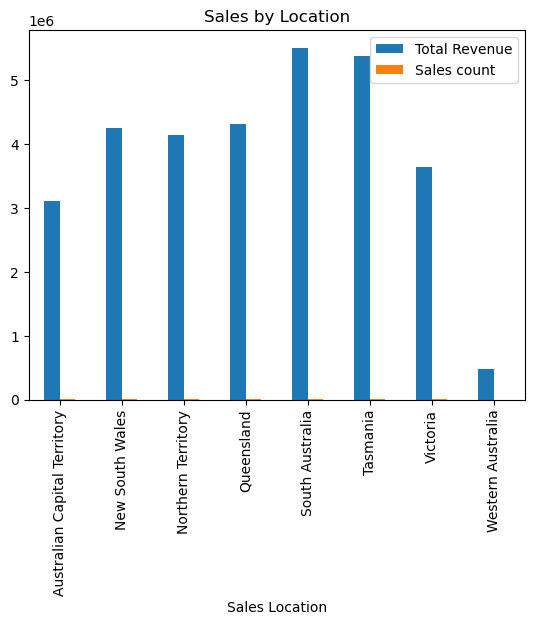

In [13]:
sales_by_location = df.groupby('Sales Location').agg({'Total Revenue': 'sum', 'Sales count': 'sum'})
sales_by_location.plot(kind='bar', title="Sales by Location")

This chart is a grouped bar chart that visualizes "Sales by Location" by comparing "Total Revenue" and "Sales count" across different Australian states and territories.

Interpretation:

* Revenue Variation Across Locations: The blue bars show significant variation in total revenue across different states and territories.
    * High Revenue Locations: South Australia and Tasmania have the highest total revenue.
    * Moderate Revenue Locations: New South Wales, Northern Territory, Queensland, and Victoria have moderate revenue.
    * Low Revenue Locations: Australian Capital Territory and Western Australia have the lowest total revenue.
* Sales Count: The orange bars are very small and barely visible. This indicates that the scale of "Sales count" is significantly lower than "Total Revenue" and is not easily comparable on this chart. It could also mean that the sales count is relatively consistent across all locations.
* Location Performance:
    * South Australia and Tasmania are the top performers in terms of revenue.
    * Australian Capital Territory and Western Australia are the lowest performers in terms of revenue.
* Potential for Further Analysis:
    * Investigate the factors contributing to the higher revenue in South Australia and Tasmania.
    * Explore potential strategies to improve sales performance in Australian Capital Territory and Western Australia.
 * Re-evaluate the "Sales count" data for potential errors or alternative representations.

Implications:

* Regional Sales Disparities: The chart highlights the significant differences in sales revenue across different regions.
* Market Focus: The company might want to focus on strategies to maximize sales in high-performing regions and improve sales in low-performing regions.
* Resource Allocation: Resources might be allocated based on regional sales performance.
* Potential for Expansion: The company might consider expanding its presence in high-performing regions.

This chart shows the variations in sales revenue across different Australian states and territories, with South Australia and Tasmania being the top performers. The "Sales count" data is not effectively represented in this visualization.

#### Sales by Location and Medium
This stacked bar chart analyzes sales by both location and sales medium, helping understand how different mediums (e.g., online, offline) perform in various locations.

<Axes: xlabel='Sales Location'>

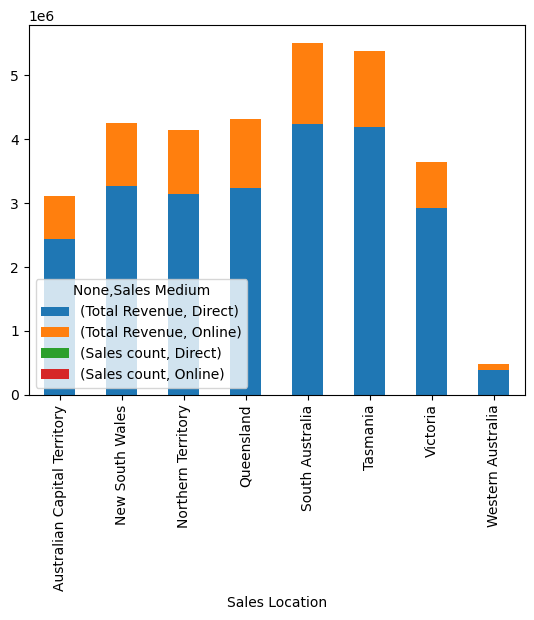

In [14]:
sales_by_location_and_medium = df.groupby(['Sales Location', 'Sales Medium']).agg({'Total Revenue': 'sum', 'Sales count': 'sum'})
sales_by_location_and_medium.unstack('Sales Medium').plot(kind='bar', stacked=True)

This chart is a stacked bar chart that visualizes "Sales by Location" and breaks down the sales by "Sales Medium" (Direct and Online). 

Interpretation:

* Revenue Breakdown: The chart shows how much of the "Total Revenue" in each location comes from "Direct" and "Online" sales channels.
* Sales Count Breakdown: The chart also shows how much of the "Sales count" in each location comes from "Direct" and "Online" sales channels, but the green and red segments are very small, suggesting the sales counts are much smaller than the total revenue.
* Location Comparison:
    * South Australia and Tasmania: Have the highest overall revenue, with a significant contribution from online sales.
    * New South Wales, Queensland, Northern Territory, and Victoria: Have moderate revenue with a mix of direct and online sales.
    * Australian Capital Territory and Western Australia: Have the lowest overall revenue.
* Sales Medium Comparison:
    * In most locations, online sales contribute a significant portion of the total revenue.
    * However, the ratio of direct to online sales varies across locations.
* Sales Count Discrepancy: The "Sales count" (green and red segments) is very small compared to the "Total Revenue" (blue and orange segments). This suggests that the sales count data might be on a different scale or not as relevant as the revenue data for this visualization.

Key Insights:

* Online sales play a crucial role in generating revenue across all locations.
* The distribution of direct and online sales varies by location, indicating regional differences in customer behavior or sales strategies.
* South Australia and Tasmania are the leading regions in terms of overall revenue, with strong online sales performance.

Implications:

* The company should analyze the factors contributing to the success of online sales in South Australia and Tasmania.
* The company should investigate the reasons for the low sales count in comparison to revenue.
* The company should tailor its sales strategies to the specific characteristics of each location.

#### Sales by Medium
This bar chart compares sales and revenue performance across different sales mediums, providing insights into which sales channel is most effective.

<Axes: title={'center': 'Sales by Medium'}, xlabel='Sales Medium'>

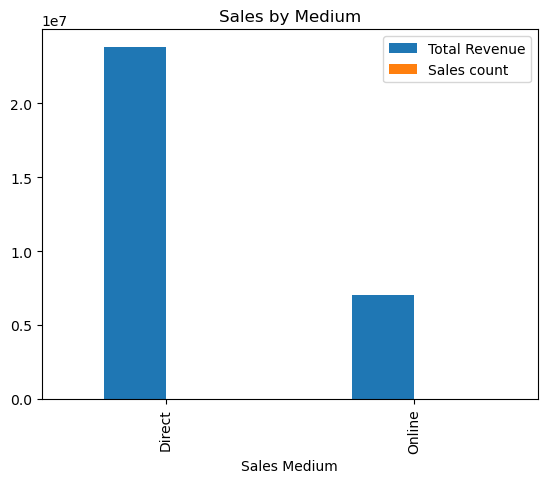

In [15]:
sales_by_medium = df.groupby('Sales Medium').agg({'Total Revenue': 'sum', 'Sales count': 'sum'})
sales_by_medium.plot(kind='bar', title="Sales by Medium")

This chart is a bar chart comparing "Sales by Medium", specifically "Direct" and "Online" sales, in terms of "Total Revenue" and "Sales count". 

Interpretation:

* Direct Sales Dominance: The blue bar for "Direct" sales is significantly taller than the blue bar for "Online" sales. This indicates that direct sales generate considerably more revenue than online sales.
* Sales Count Discrepancy: The orange bars are very small and barely visible. This suggests that the sales count is much lower in magnitude compared to total revenue. It also indicates that the sales count data might not be as informative in this visualization.
* Revenue Ratio: The direct sales revenue is approximately three times higher than the online sales revenue.

Key Insights:

* Direct sales are the primary driver of revenue.
* Online sales, while contributing, are significantly less than direct sales in terms of revenue.
* The relationship between sales count and revenue is not clearly shown in this chart due to the scale difference.

Implications:

* The company should focus on understanding the reasons for the strong performance of direct sales.
* The company should investigate strategies to boost online sales revenue.
* The sales count data needs to be reassessed for its usefulness in this context.

This chart highlights the strong performance of direct sales compared to online sales in terms of total revenue.

#### Sales Count vs Revenue by Medium (Scatter Plot)
A scatter plot showcasing the relationship between sales count and revenue across different sales mediums. This can help identify if more sales lead to more revenue or if certain mediums are more efficient in generating high revenue.

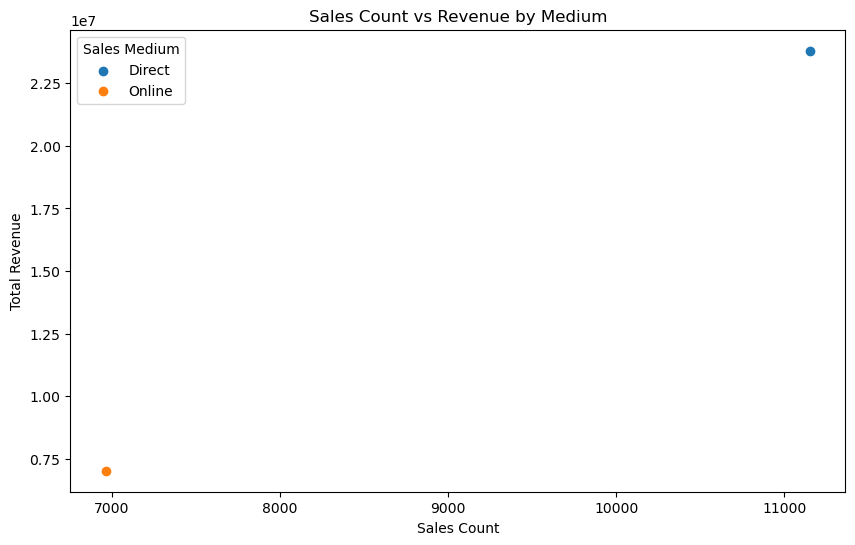

In [16]:
# Grouping by Sales Medium and aggregating the sum of Sales count and Total Revenue
medium_sales_scatter = df.groupby('Sales Medium').agg({'Sales count': 'sum', 'Total Revenue': 'sum'})

# Create a scatter plot with different colors for each Sales Medium
plt.figure(figsize=(10, 6))

# Loop through each medium to plot them with different colors
for medium in medium_sales_scatter.index:
    medium_data = medium_sales_scatter.loc[medium]
    plt.scatter(medium_data['Sales count'], medium_data['Total Revenue'], label=medium)

# Adding labels and title
plt.title("Sales Count vs Revenue by Medium")
plt.xlabel('Sales Count')
plt.ylabel('Total Revenue')

# Adding the legend to differentiate between the mediums
plt.legend(title='Sales Medium')

# Show the plot
plt.show()

Interpretation:

* Two Distinct Data Points: The chart shows two data points, one for "Direct" and one for "Online" sales.
* Direct Relationship: There is a clear direct relationship between sales count and total revenue. The point representing "Direct" sales has both a higher sales count and a higher total revenue compared to "Online" sales.
* Significant Revenue Difference: There's a significant difference in total revenue between the two mediums, with "Direct" sales generating much more revenue.

Key Insights:

* "Direct" sales significantly outperform "Online" sales in terms of both sales count and total revenue.
* The relationship between sales count and revenue appears to be linear in this limited dataset.
* "Direct" sales are the primary driver of revenue in this dataset.

Implications:

* Focus on "Direct" sales to maximize overall sales and revenue.
* Further investigation into the factors driving the higher performance of "Direct" sales is warranted.
* Consider strategies to improve "Online" sales performance.

This chart clearly shows that "Direct" sales generate significantly more revenue and have a higher sales count compared to "Online" sales.

### 11. Correlation Analysis
We examine the correlation between numerical variables.

The correlation matrix helps determine how strongly different numerical variables are related to each other. For instance, understanding how sales count and total revenue are correlated is key to predicting future sales performance.

In [17]:
correlation = df[['Sales count', 'Total Revenue', 'Product Count']].corr()
print(correlation)

               Sales count  Total Revenue  Product Count
Sales count            NaN            NaN            NaN
Total Revenue          NaN            1.0            NaN
Product Count          NaN            NaN            NaN


The NaN correlations for 'Sales count' and 'Product Count' strongly suggest that these columns have constant values, which we can see in the dataset

##### Insights:

Correlation analysis reveals relationships between sales count, total revenue, and product count.

### 12. Revenue per Sale Analysis
We calculate and analyze the revenue generated per sale. This section calculates the average revenue per sale for each product, giving insights into the profitability of individual products.

In [18]:
# Ensure that 'Total Revenue' and 'Sales count' columns are numeric
df['Revenue per Sale'] = df['Total Revenue'] / df['Sales count']

# Group by 'Product Name' and calculate the mean revenue per sale
revenue_per_sale_by_product = df.groupby('Product Name').agg({'Revenue per Sale': 'mean'})

# Display the result to check the output
print(revenue_per_sale_by_product)

                  Revenue per Sale
Product Name                      
Kit Kat                1125.726648
Maggi                  1431.878990
Milo                   3676.751834
Nes Cau                2268.501441
Nescafe                 870.120375
Nescafe Gold           1331.211609
Nesquik Duo            4215.940394
Nestle Drumstick       1577.497426
Smarties               2966.537917


<Figure size 1000x600 with 0 Axes>

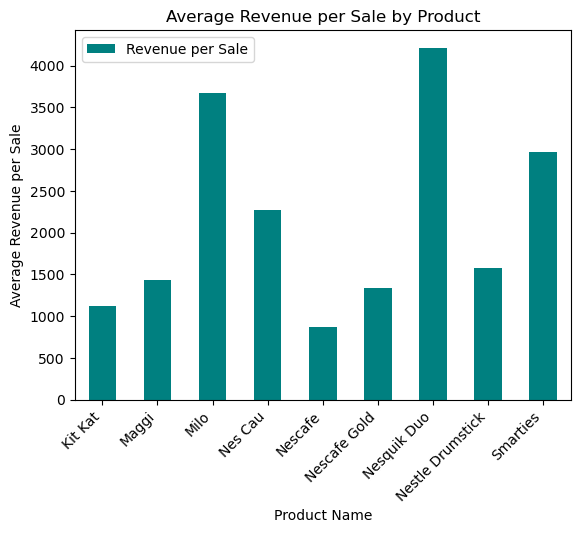

In [19]:
# Plot the revenue per sale by product
plt.figure(figsize=(10, 6))
revenue_per_sale_by_product.plot(kind='bar', color='teal')
plt.title("Average Revenue per Sale by Product")
plt.xlabel("Product Name")
plt.ylabel("Average Revenue per Sale")
plt.xticks(rotation=45, ha='right')
plt.show()

This chart is a vertical bar chart displaying the "Average Revenue per Sale by Product".

Interpretation:

* Revenue per Sale Comparison: The chart visually compares the average revenue generated per sale for each product.
* Highest Revenue per Sale: "Nesquik Duo" has the highest average revenue per sale.
* Lowest Revenue per Sale: "Nescafe" has the lowest average revenue per sale.
* Significant Revenue Difference: There is a noticeable difference in average revenue per sale between "Nesquik Duo" and "Nescafe" compared to the other products.
* Revenue Variation: The average revenue per sale varies significantly across different products.

Implications:

* Product Profitability: "Nesquik Duo" generates the highest average revenue per sale, suggesting it may be a high-profit-margin product.
* Pricing Strategy: The company might want to analyze the pricing strategy for "Nesquik Duo" to understand why it generates higher revenue per sale.
* Product Portfolio Analysis: This chart provides a good overview of the product portfolio based on average revenue per sale and can be used for further analysis to understand the factors contributing to the revenue differences.

Potential for Further Investigation:
* Investigate the factors contributing to the higher revenue per sale for "Nesquik Duo".
* Explore potential strategies to improve the revenue per sale for other products.
* Compare this chart with the "Top 10 Products by Sales Count" and "Top 10 Products by Revenue" charts to get a more comprehensive understanding of product performance.

* Nescafe's Case: Nescafe having the lowest revenue per sale, but high sales count, indicates a high-volume, low-margin product strategy.

This chart highlights the average revenue generated per sale for each product, with "Nesquik Duo" being the clear leader and "Nescafe" being the lowest. It provides a quick and effective way to visualize product profitability and inform business strategies.

### 13. Outlier Detection
We use boxplots to identify potential outliers in total revenue.

The boxplot helps identify the distribution of the total revenue, highlighting outliers and providing an overview of the spread and central tendency.

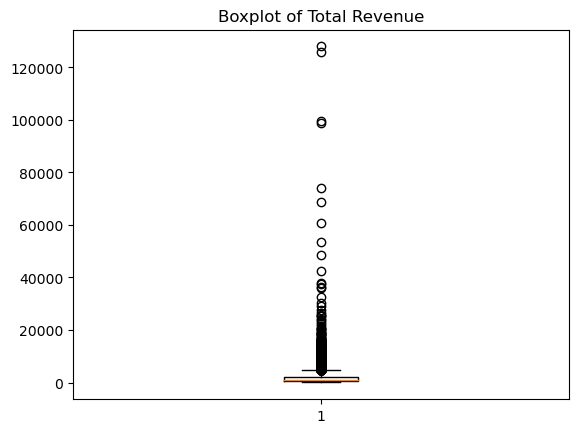

In [20]:
plt.boxplot(df['Total Revenue'])
plt.title("Boxplot of Total Revenue")
plt.show()

Interpretation:

* Skewed Distribution: The box is relatively short, and the whiskers are also short, but there is a very long tail of outliers. This indicates a highly skewed distribution with a large number of outliers on the higher end of the revenue range.
* Low Median and IQR: The median is relatively low, and the IQR is also small, indicating that a significant portion of the sales have low revenue.
* Numerous Outliers: There are numerous outliers at the higher end of the revenue range, indicating that there are some sales with significantly higher revenue than the rest.
* Concentration of Low Revenue Sales: The short box and whiskers suggest that most sales fall within a relatively narrow and low revenue range.
* High Variability: The presence of numerous outliers indicates high variability in the total revenue.

Implications:

* Revenue Disparity: There is a significant disparity in revenue, with a few high-revenue sales contributing significantly to the overall revenue.
* Potential for Outlier Analysis: The outliers might represent large orders, special events, or other factors that need further investigation.
* Skewness Management: The high skewness of the data might require data transformation or other techniques for further analysis.
* Targeted Strategies: The company might want to develop targeted sales or marketing strategies to maximize revenue from high-revenue sales.
* Typical Sales: The typical sale generates a relatively low revenue.

This boxplot reveals that the "Total Revenue" distribution is highly skewed, with a concentration of low-revenue sales and numerous high-revenue outliers. The outliers significantly impact the overall revenue and warrant further investigation.

Through this comprehensive EDA, we gain insights into the sales performance of Nestle products across different categories, sales mediums, and locations. Key takeaways include:

Identifying top-performing products and sales locations

Analyzing sales trends over time (daily, weekly, and monthly)

Understanding the relationship between sales count and revenue

Identifying any significant outliers or patterns in total revenue

This analysis provides a solid foundation for further business decision-making, such as focusing on high-performing products and optimizing sales strategies across different regions and mediums.